In [24]:
%matplotlib inline

import lightkurve as lk
import matplotlib.pyplot as plt

# Description of Star looking for
- TIC 7582594
- RA 272.3966
- DEC 45.8308
- cadence 2 minute target
- Sectors 14,25,26
- mission TESS

## Several ways to search for the data

In [7]:
# do a general search first to see all available data

search_results_0 = lk.search_lightcurvefile(target='TIC 7582594',mission='TESS')
search_results_0

#,observation,target_name,productFilename,distance
0,TESS Sector 14,7582594,tess2019198215352-s0014-0000000007582594-0150-s_lc.fits,0.0
1,TESS Sector 25,7582594,tess2020133194932-s0025-0000000007582594-0182-s_lc.fits,0.0
2,TESS Sector 26,7582594,tess2020160202036-s0026-0000000007582594-0188-s_lc.fits,0.0


In [8]:
# do another general search but with RA/DEC
radec = "272.3966 45.8308"
search_results_1 = lk.search_lightcurvefile(target=radec,mission='TESS')
search_results_1

#,observation,target_name,productFilename,distance
0,TESS Sector 14,7582594,tess2019198215352-s0014-0000000007582594-0150-s_lc.fits,0.0
1,TESS Sector 25,7582594,tess2020133194932-s0025-0000000007582594-0182-s_lc.fits,0.0
2,TESS Sector 26,7582594,tess2020160202036-s0026-0000000007582594-0188-s_lc.fits,0.0


In [6]:
# test a different cadence (default above was ='long')

search_results_2 = lk.search_lightcurvefile(target='TIC 7582594',cadence='short',mission='TESS')
search_results_2
### it appears cadence doesn't matter for us

#,observation,target_name,productFilename,distance
0,TESS Sector 14,7582594,tess2019198215352-s0014-0000000007582594-0150-s_lc.fits,0.0
1,TESS Sector 25,7582594,tess2020133194932-s0025-0000000007582594-0182-s_lc.fits,0.0
2,TESS Sector 26,7582594,tess2020160202036-s0026-0000000007582594-0188-s_lc.fits,0.0


## Download desired data

In [9]:
# isolate to desired sector 14
search_results_3 = lk.search_lightcurvefile(target='TIC 7582594',mission='TESS',sector=14)
search_results_3

#,observation,target_name,productFilename,distance
0,TESS Sector 14,7582594,tess2019198215352-s0014-0000000007582594-0150-s_lc.fits,0.0


In [17]:
# download the desired file & check the object type - important for API 
lcf = search_results_3.download()
lcf, type(lcf)

TessLightCurveFile(TICID: 7582594)

In [20]:
# convert from LightCurveFile to LightCurve
lc = lcf.PDCSAP_FLUX
lc, type(lc)

(TessLightCurve(TICID: 7582594), lightkurve.lightcurve.TessLightCurve)

# Work with the data arrays

In [23]:
# let's separate all the data into individual arrays

time = lc.time
flux = lc.flux
flux_uncertainty = lc.flux_err

print('TIME: ',time)
print('FLUX: ',flux)
print('FLUX UNCERTAINTY: ',flux_uncertainty)

TIME:  [1683.35584858 1683.35723744 1683.35862631 ... 1710.20254019 1710.20392905
 1710.2053179 ]
FLUX:  [60160.133 60179.266 60215.21  ... 60136.266 60163.066 60086.008]
FLUX UNCERTAINTY:  [34.669052 34.672684 34.64668  ... 34.635914 34.698235 34.70957 ]


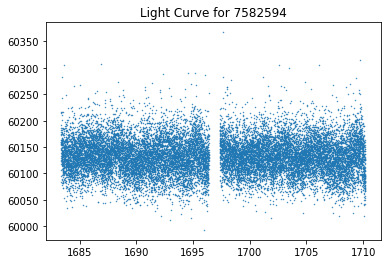

In [26]:
# we can plot them separately

plt.scatter(time,flux,s=.2)
plt.title('Light Curve for {}'.format(lc.targetid));

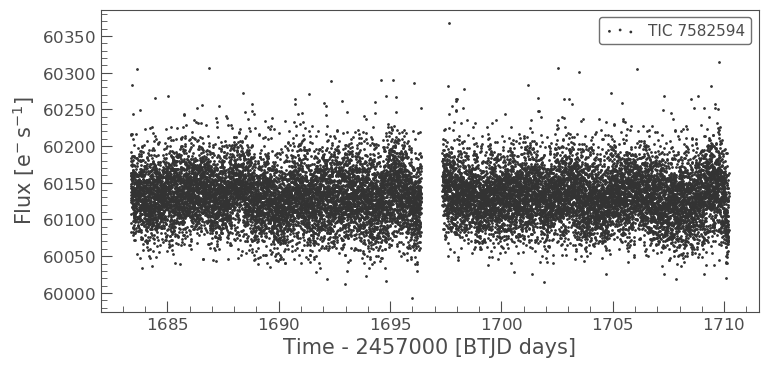

In [28]:
# we can also use lightkurve

lc.scatter()